# Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier as KNN

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")


# Reading the data file

In [29]:
# read data file 
df = pd.read_csv("magic04.data", header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [30]:
#counts for each class
x = df.drop(columns=10)
y = df[10]
y.value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

# Removing duplicates from the data file and Encoding into 0's and 1's

In [31]:
#Removing duplicate data
df.duplicated().sum()
df=df.drop_duplicates()

In [32]:
#encoding the the non-numeric data into 0's and 1's, i.e(g = 0 and h = 1)
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Target Distribution before balancing')

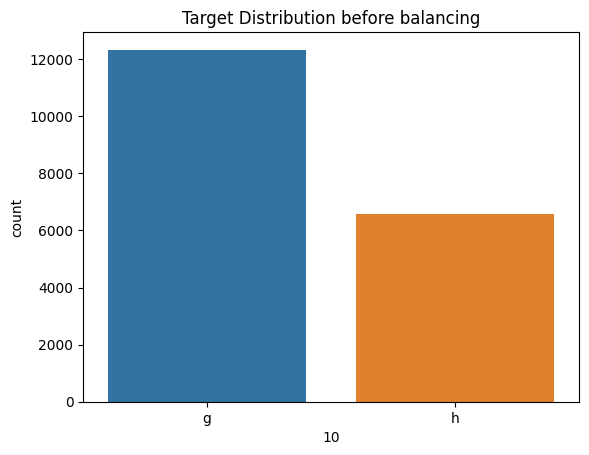

In [33]:
#Check the distributaion of Target variable.
sns.countplot(x=10, data=df,)
plt.title('Target Distribution before balancing')

In [34]:
#Balancing data
resampler = RandomUnderSampler(random_state=42)
x, y = resampler.fit_resample(x, y)
pd.DataFrame(y).value_counts()


0    6688
1    6688
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Distribution after balancing')

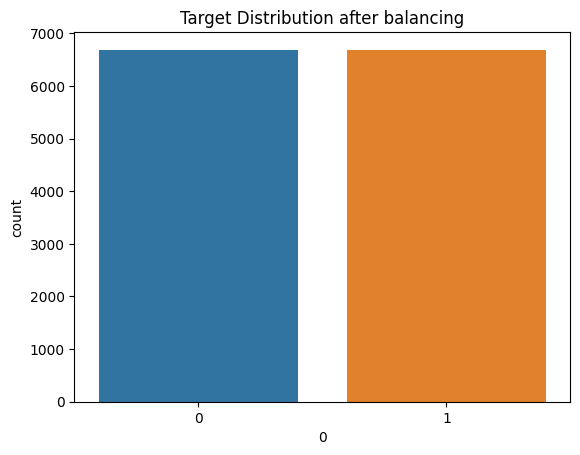

In [35]:
sns.countplot(x=0, data=pd.DataFrame(y),)
plt.title('Target Distribution after balancing')

# Normalizing the data

In [36]:
#Plot function
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

In [37]:
# turn to np arrays and normalize y
x = np.array(x)
y = np.array(y)

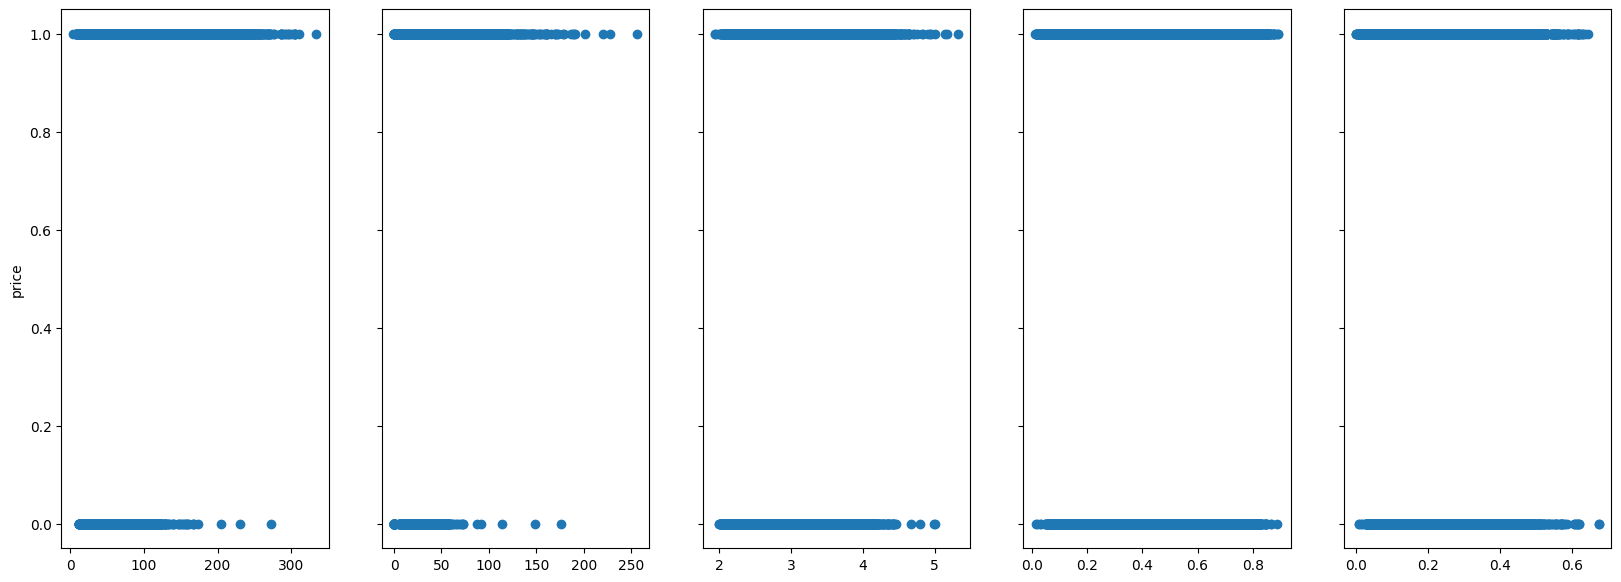

In [38]:
#Plot before normalize
plot_features(x, y, n_features=5)

In [39]:
# normalize data
scaler = StandardScaler()
x = scaler.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,13376.000000,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,13376.000000,13376.000000,13376.000000,13376.000000,1.337600e+04
mean,0.000000,1.699863e-17,-1.138908e-15,2.974760e-17,1.338642e-16,0.000000,0.000000,0.000000,0.000000,4.249658e-18
std,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037,1.000037,1.000037,1.000037e+00
min,-1.127508,-1.133850e+00,-1.892575e+00,-1.985823e+00,-1.913371e+00,-6.881124,-6.013030,-8.884994,-1.165906,-2.540439e+00
25%,-0.695597,-5.725646e-01,-7.321727e-01,-7.894450e-01,-7.817974e-01,-0.257698,-0.397603,-0.484783,-0.895471,-6.885832e-01
50%,-0.396412,-3.134357e-01,-1.855942e-01,-1.267208e-01,-1.521529e-01,0.158529,0.126236,-0.010683,-0.295185,-2.493378e-02
75%,0.403141,1.177649e-01,5.797416e-01,6.862462e-01,6.507554e-01,0.478232,0.491079,0.465791,0.782802,6.290579e-01
max,5.887093,1.113860e+01,5.214415e+00,2.791003e+00,4.114246e+00,8.909961,4.091646,7.741114,2.170920,3.932278e+00


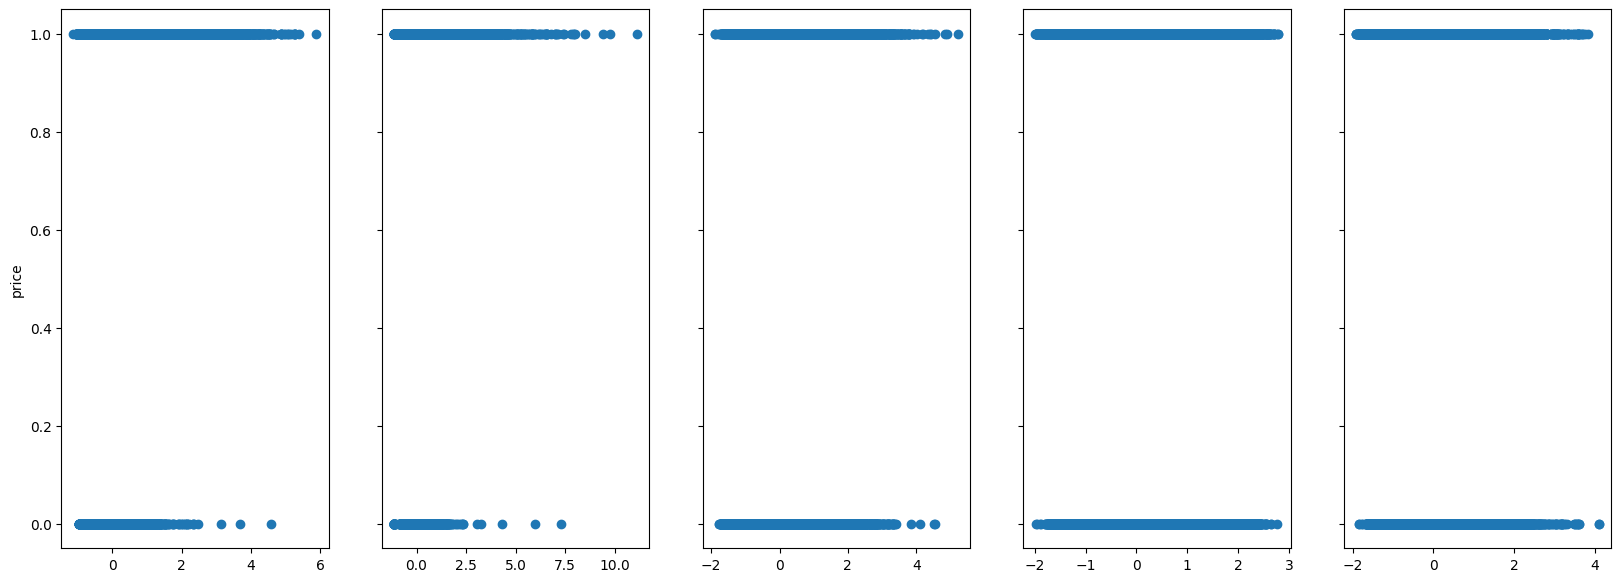

In [40]:
#Plot after normalize
plot_features(x, y, n_features=5)

# Training the data using model and evaluate the performance

In [41]:
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.7, random_state=0)

# Logistic Regression Model

In [42]:
# Logistic Regression Model
model = LogReg()
params = {
    "penalty": [None, "l2"],
    "C": [0.01, 0.1, 1, 10, 50, 100]
}

lg_cv = GridSearchCV(model, param_grid=params, cv=10, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")
lg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'penalty': [None, 'l2']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [43]:
result = pd.DataFrame(lg_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.016858,0.002605,0.007946,0.000146,0.01,None,"{'C': 0.01, 'penalty': None}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.786096,0.792458,0.016668,2
1,0.011991,0.003997,0.006396,0.003198,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.778607,0.738806,0.745636,...,0.818182,0.820359,0.825301,0.774566,0.837349,0.765714,0.788889,0.799791,0.024095,1
2,0.015031,0.002393,0.007548,0.001340,0.1,None,"{'C': 0.1, 'penalty': None}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.786096,0.792458,0.016668,2
3,0.014300,0.003346,0.006906,0.002404,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.783582,0.733831,0.743142,...,0.806818,0.802326,0.801136,0.787709,0.818713,0.765363,0.778378,0.791612,0.018178,12
4,0.016290,0.004222,0.008128,0.003481,1,None,"{'C': 1, 'penalty': None}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.786096,0.792458,0.016668,2
5,0.017613,0.003194,0.008668,0.002463,1,l2,"{'C': 1, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.806818,0.802326,0.805714,0.793296,0.813953,0.761111,0.784946,0.792456,0.016994,9
6,0.017129,0.002385,0.006150,0.003098,10,None,"{'C': 10, 'penalty': None}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.786096,0.792458,0.016668,2
7,0.014281,0.003186,0.008157,0.000472,10,l2,"{'C': 10, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.784946,0.792343,0.016715,10
8,0.015109,0.002538,0.006517,0.003267,50,None,"{'C': 50, 'penalty': None}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.786096,0.792458,0.016668,2
9,0.014415,0.003222,0.007216,0.002420,50,l2,"{'C': 50, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.806818,0.807018,0.804598,0.793296,0.809249,0.761111,0.784946,0.792343,0.016715,10


In [44]:
selected_results = result[["param_penalty", "param_C", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
selected_results

,param_penalty,param_C,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,None,0.01,0.766704,0.792458,0.748387,0.709277
1,l2,0.01,0.765956,0.799791,0.744436,0.696550
2,None,0.1,0.766704,0.792458,0.748387,0.709277
3,l2,0.1,0.764958,0.791612,0.746032,0.705716
4,None,1,0.766704,0.792458,0.748387,0.709277
5,l2,1,0.766704,0.792456,0.748402,0.709279
6,None,10,0.766704,0.792458,0.748387,0.709277
7,l2,10,0.766455,0.792343,0.748065,0.708769
8,None,50,0.766704,0.792458,0.748387,0.709277
9,l2,50,0.766455,0.792343,0.748065,0.708769


In [45]:
lg_cv.best_params_

{'C': 0.01, 'penalty': None}

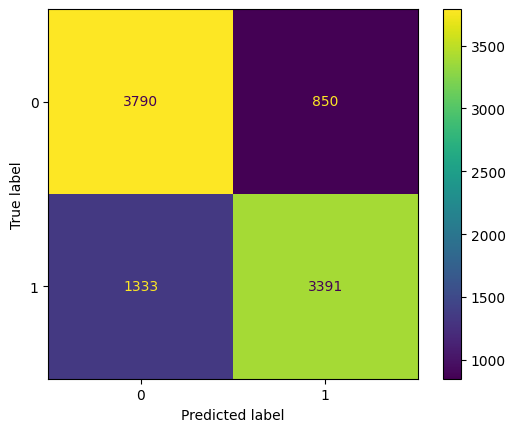

In [46]:
lg_prediction = lg_cv.best_estimator_.predict(x_eval)
m = confusion_matrix(y_eval, lg_prediction)
cm = ConfusionMatrixDisplay(m)
cm.plot()

In [47]:
print(classification_report(y_eval, lg_prediction))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      4640
           1       0.80      0.72      0.76      4724

    accuracy                           0.77      9364
   macro avg       0.77      0.77      0.77      9364
weighted avg       0.77      0.77      0.77      9364



# K-NN Model

In [48]:
#KNN Model
knn_model = KNN()

params = {
    "n_neighbors": list(range(3,20,2))
}
knn_cv = GridSearchCV(knn_model, param_grid=params, cv=10, return_train_score=True, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [49]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [50]:
knn_result = pd.DataFrame(knn_cv.cv_results_)
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision
0,0.004650,0.005235,0.056165,0.029664,3,{'n_neighbors': 3},0.766169,0.771144,0.778055,0.783042,...,0.909826,0.909714,0.905289,0.900000,0.909932,0.906115,0.909373,0.909147,0.907248,0.003054
1,0.003963,0.003966,0.045663,0.005131,5,{'n_neighbors': 5},0.756219,0.778607,0.795511,0.800499,...,0.902487,0.902423,0.902614,0.897287,0.904886,0.896104,0.906640,0.900131,0.902842,0.003973
2,0.003804,0.003838,0.051044,0.005203,7,{'n_neighbors': 7},0.761194,0.788557,0.773067,0.820449,...,0.897659,0.898590,0.892502,0.894282,0.886200,0.893333,0.894000,0.891406,0.894181,0.003542
3,0.004348,0.003685,0.054764,0.009195,9,{'n_neighbors': 9},0.736318,0.783582,0.773067,0.820449,...,0.895412,0.891304,0.883768,0.887118,0.886394,0.890467,0.892130,0.888444,0.890495,0.004473
4,0.004008,0.003625,0.053941,0.002707,11,{'n_neighbors': 11},0.746269,0.788557,0.778055,0.815461,...,0.885619,0.887285,0.880107,0.884693,0.884771,0.887679,0.888433,0.889193,0.887611,0.004124
5,0.004802,0.003921,0.056000,0.003656,13,{'n_neighbors': 13},0.763682,0.766169,0.773067,0.830424,...,0.880272,0.882957,0.882433,0.878664,0.881669,0.883529,0.886806,0.882231,0.883897,0.003857
6,0.003644,0.003506,0.057461,0.007146,15,{'n_neighbors': 15},0.758706,0.756219,0.760599,0.822943,...,0.876535,0.878201,0.875257,0.875510,0.884008,0.883414,0.884189,0.883997,0.881628,0.004604
7,0.005153,0.003210,0.058358,0.005050,17,{'n_neighbors': 17},0.758706,0.763682,0.758105,0.815461,...,0.879834,0.877708,0.874483,0.874827,0.881570,0.881450,0.878322,0.878936,0.879906,0.003794
8,0.003350,0.003478,0.056563,0.004005,19,{'n_neighbors': 19},0.756219,0.768657,0.755611,0.820449,...,0.872603,0.874298,0.871813,0.868132,0.875872,0.875348,0.870720,0.879044,0.874661,0.003763


In [51]:
knn_selected_results = knn_result[["param_n_neighbors", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
knn_selected_results

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,3,0.784903,0.824654,0.764674,0.713366
1,5,0.790640,0.838865,0.768255,0.709311
2,7,0.793628,0.846869,0.770262,0.706744
3,9,0.789397,0.847062,0.764109,0.696566
4,11,0.793133,0.856059,0.766663,0.694528
5,13,0.792636,0.856933,0.765444,0.691982
6,15,0.785408,0.850599,0.756636,0.681793
7,17,0.785406,0.854046,0.755624,0.678214
8,19,0.786652,0.849295,0.758915,0.686367


In [52]:
knn_cv.best_params_

{'n_neighbors': 7}

In [53]:
knn_prediction = knn_cv.best_estimator_.predict(x_eval)

print(classification_report(y_eval, knn_prediction))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      4640
           1       0.86      0.72      0.79      4724

    accuracy                           0.80      9364
   macro avg       0.81      0.80      0.80      9364
weighted avg       0.81      0.80      0.80      9364



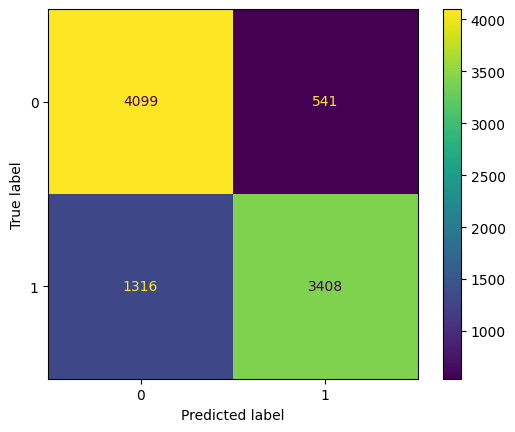

In [54]:
m = confusion_matrix(y_eval, knn_prediction)
p = ConfusionMatrixDisplay(m)
p.plot()